# DS 2.1 notes
---

# Lesson 1: Intro to Machine Leaning

In [2]:
import pandas as pd 
import numpy as np
  
# initialize list of lists 
data = [[1000, 2], [1500, 3]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['x', 'y']) 

# print dataframe. 
df

,x,y
0,1000,2
1,1500,3


## Min Max Scaler


In [12]:
def max_min_scaler(matrix):
    return pd.DataFrame(zip(*[(np.array(matrix[column]) - min(matrix[column])) / (max(matrix[column]) - (min(matrix[column]))) for column in matrix]), columns = matrix.columns)
max_min_scaler(df)

,x,y
0,0.0,0.0
1,1.0,1.0


In [13]:
new_df = df.copy()
for column in df:
    col_range = max(df[column]) - min(df[column])
    col_arr = np.array(df[column])
    col_arr -= min(col_arr)
    col_arr = col_arr / col_range
    new_df[column] = col_arr
new_df

,x,y
0,0.0,0.0
1,1.0,1.0


## Use sklearn to do it for us

In [14]:
import sklearn
sklearn.__version__

'0.20.3'

In [15]:
from sklearn import preprocessing


X_train = np.array([[1000, 2], [1500, 3]])

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
print(X_minmax)

[[0. 0.]
 [1. 1.]]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Standard Scaling

### Do it yourself:

In [16]:
def standard_scaler(np_matrix):
    return (np_matrix - np_matrix.mean(axis=0)) / np_matrix.std(axis=0)
standard_scaler(X_train)

array([[-1., -1.],
       [ 1.,  1.]])

### Let sklearn do it

In [17]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit_transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1., -1.],
       [ 1.,  1.]])

---
# Lesson 2: Linear Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])


Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

Text(0, 0.5, 'Water Drinks (Litre)')

## How do we find the line of best fit?

### We can try a creating our own line and finding its error

6.518593101764703


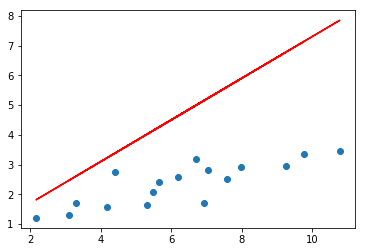

In [19]:
predicted_y_values = list(map(lambda x: 0.7*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### We can use this function to find the mean squared error of the line

In [20]:
def find_error(x_values, y_values, w0, w1):
    total = 0
    for x, y in zip(x_values, y_values):
        total += (y - ((w1 * x) + w0)) ** 2
    return total / len(x_values)

In [21]:
find_error(X, Y, 0.3, 0.7)

6.518593101764703

In [22]:
def find_error(x_values, y_values, w0, w1):
    return np.mean([(y - ((w1 * x) + w0)) ** 2 for x,y in zip(x_values, y_values)])

In [23]:
find_error(X, Y, 0.5, 0.3)

0.16668653705882344

In [24]:
# This is garbage, has nothing to do with class. disregard it.
def weird_avg(values):
    ''''''
    curr = None
    for val in values:
        if curr is None:
            curr = val
        else:
            curr = (curr + val) / 2
    return curr

### If we change the slope and y-int to 0.3 and 0.8 the line becomes more accurate

0.16668653705882344


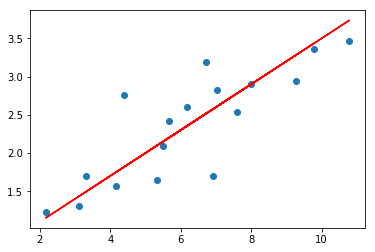

In [25]:
predicted_y_values = list(map(lambda x: 0.3*x + 0.5, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### It looks good but how to we find out the best slope and y int?

# KNOW THIS

In [26]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


### This is the lowest error we'll have

In [27]:
find_error(X, Y, 0.79880123, 0.25163494)

0.15385767404191164

0.15385767404191164


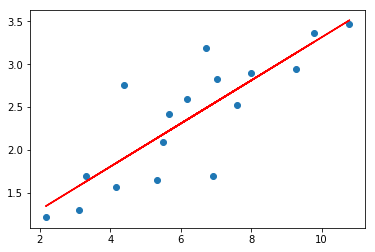

In [28]:
predicted_y_values = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

In [29]:
0.25163494*5 + 0.79880123

2.05697593

### We can also predict the value of another point using the predict method

In [30]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

#### Numpy allows us to reshape arrays with unlimited dimensions.

#### It's useful for sklearn because many methods require 2d arrays.

In [31]:
np.array([i for i in range(64)]).reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

#### How to predict a value given a few parameters or "features"... 

- Visit DS2.0-Machine-Learning/Notebooks/simple_learn_regression.ipynb

In [32]:
x = np.array([[1,3],[7,2]])
x

array([[1, 3],
       [7, 2]])

In [33]:
X = np.array([10 ** i for i in range(9)])
Y = np.array([1, 10, 100, 475, 1675, 4954, 12952, 30817, 67987])

lr_reg = LinearRegression()
lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
print(lr_reg.coef_)
print(lr_reg.intercept_)



[[0.00064743]]
[5226.08388164]


In [34]:
import matplotlib.pyplot as plt

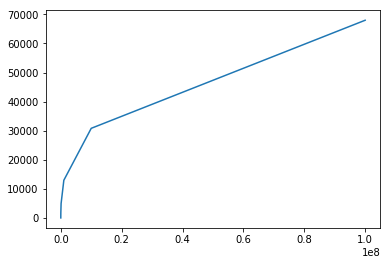

In [35]:
plt.plot([10 ** i for i in range(9)] , Y)

In [36]:
Y = [1, 10, 100, 475, 1675, 4954, 12952, 30817, 67987]

Z = [y - Y[i - 1] if i > 0 else y for i, y in enumerate(Y)]

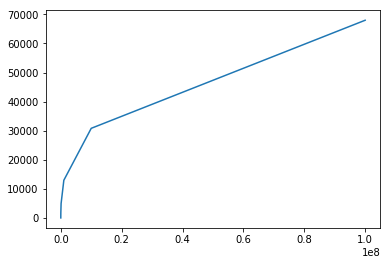

In [37]:
plt.plot(X, Y)

---
# Lesson 3: Review of Linear regression:

Text(0, 0.5, 'water drank in oz')

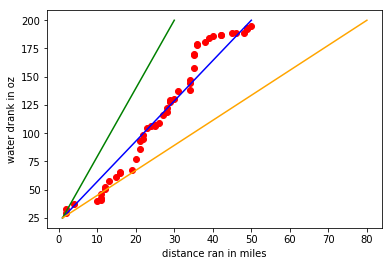

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
X = np.array(sorted([randint(1,50) for i in range(50)]))
Y = np.array(sorted([randint(25,200) for i in range(50)]))
plt.plot(X,Y, 'ro')
plt.plot([1,50], [25,200], c='blue')
plt.plot([1,30], [25,200], c='green')
plt.plot([1,80], [25,200], c='orange')
plt.xlabel('distance ran in miles')
plt.ylabel('water drank in oz')

### The plot:
- Here I plotted 50 somewhat random points and I want to find the line of best fit.
- The blue line fits better than the green and yellow lines.
- We can also say the blue line has the least error
- To find the line of best fit we can use sklearn Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

w1 = lr_reg.coef_[0][0]
w0 = lr_reg.intercept_[0]
print('w1 (slope) =', w1)
print('w0 (intercept) =', w0)

w1 (slope) = 4.1216442214593805
w0 (intercept) = 6.690740251738362


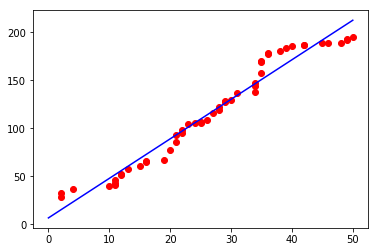

In [40]:
plt.plot(X,Y, 'ro')
plt.plot([0,50], [w0,w0 + (w1 * 50)], c='b')
plt.show()

### Error
- Error is defined as the sum of all errors from each point, to the line, squared.
- Error = sum((Ytrue[i] - Ypredict[i])**2 for i in range(len(Ytrue)))
- Mean squared error is this error divided by the length of Ytrue

<img src="images/lreg_1.png" width="600" height="600">

#### This is what error looks like in our graph:
- the black dots are our coordinates
- the blue line is the line of best fit
- the red lines are the error

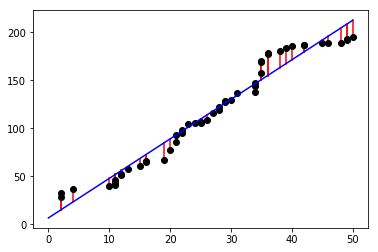

In [41]:
# this will create a line from each point to the line vertically.
for x , y in zip(X,Y):
    plt.plot([x,x], [y ,(x * w1) + w0], c='r')
# If you added all them you'd get the error
# if you then take the mean and square it you'll get the MSE

plt.plot(X,Y, 'ro', c='black')
plt.plot([0,50], [w0,w0 + (w1 * 50)], c='b')
plt.show()

### Goal of linear regression: 
- to obtain the minimum error (optimal w0 and w1). Find the line of best fit.

## Steps in machine learning:
1. Read and manipulate data (pandas)
2. Figure out features and target
3. Do data normalization (numpy)
4. Split the data into train and test parts
5. Instantiate a mL model (reg_model = linearRegression())
6. Train (fit) the model with Xtrain (reg_model.fit(Xtrain, Ytrain))
7. Evaluate the model with Xtest (reg_model.predict(Xtest))
    
### Model evaluation for LR:
1. Mean squared error: compare reg_model.predict(Xtest) with Ytest
2. R_score (0 and 1) closer to 1 means better model.




## Confusion matrix

|         |Healthy  | Unhealthy   |
|:--------|:--------|:------------|
| Healthy | n1 | n2|
|Unhealthy| n3 | n4|


accuracy = (n1 + n4) / (n1+ n2+ n3+ n4)

Explained in more detail later with logistic regression



#### Regression:
- MSE - mean squared error
- R^2 (closer to 1 is better)

#### Classification:
- Confusion matrix
- accuracy

--- 
# Lesson 4: Logistic regression

In [42]:
import pandas as pd

df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Break up the data into training and testing data

In [43]:
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('datasets/diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

## Build the logistic regression model

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### See what the model predicts for our y predictions

In [45]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Lets look at the actual values

In [46]:
y_test.values.T

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

#### Write a function that counts:
- how many 0s in y_pred are 0s in y_test
- how many 1s in y_pred are 1s in y_test
- how many 0s in y_pred are 1s in y_test
- how many 1s in y_pred are 0s in y_test

It should return these four values in that order

This will give us the values for our confusion matrix

In [47]:
def confusion_matrix(predicted_values, test_values):
    actual_zeroes = 0
    actual_ones = 0
    false_zeroes = 0
    false_ones = 0
    for predicted_value, test_value in zip(predicted_values, test_values):
        if predicted_value == 0 and test_value == 0:
            actual_zeroes += 1
        elif predicted_value == 1 and test_value == 1:
            actual_ones += 1
        elif predicted_value == 0 and test_value == 1:
            false_zeroes += 1
        elif predicted_value == 1 and test_value == 0:
            false_ones += 1
    return np.array([[actual_zeroes, false_ones],[false_zeroes, actual_ones]])

confusion_matrix(y_pred, y_test.values.T)

array([[118,  12],
       [ 47,  15]])

In [48]:
def one_line_confusion_matrix(predicted_values, actual_values):
    return [[sum([x == 0 and y == 0 for x, y in zip(predicted_values, actual_values)]), sum([x == 1 and y == 0 for x, y in zip(predicted_values, actual_values)])], [sum([x == 0 and y == 1 for x, y in zip(predicted_values, actual_values)]), sum([x == 1 and y == 1 for x, y in zip(predicted_values, actual_values)])]]

one_line_confusion_matrix(y_pred, y_test.values.T)

[[118, 12], [47, 15]]

## Confusion Matrix
A confusion matrix is like a punnet square from biology.
These describe the real value vs the predicted value.
It us good when the expected is the same as the real value.
This means we like when the points 0,0 and 1,1 are greater.
Optimally we want 1,0 and 0,1 to be 1. This is a perfect model.

|   | 0 | 1 |
|:--|:--|:--|
| 0 |118| 12|
| 1 | 47| 15|



### Easier way to compute elements of Confusion Matrix

In [49]:
from sklearn import metrics

# using sklearn's metrics we can create a confusion matrix that is given in a 2D array
confusion = metrics.confusion_matrix(y_test, y_pred)

confusion

array([[118,  12],
       [ 47,  15]])

#### Labeling the confusion matrix:
- True positive - when we expect a positive result and we get one. So if we expect 1 we get 1.
- True negative - the opposite of true positive, that is if we expect 0 we get 0.
- False positive - when we expect a positive result but recieve a negative one. So if we expect 1 and get 0.
- False negative - the opposite of false positives, that is if we expect 0 we get 1.

In [53]:
TN = confusion[0,0] # TRUE NEGATIVE
TP = confusion[1,1] # TRUE POSITIVE
FP = confusion[0,1] # FALSE POSITIVE
FN = confusion[1,0] # FASLE NEGATIVE

In [51]:
[[TN, FP],
 [FN, TP]]

[[118, 12], [47, 15]]

In [52]:
# Indexing multidimentional arrays normally is done like so.
arr_2d = [['00','01'],['10','11']]
arr_2d[1][0] # returns '10'

# Numpy arrays offers a cleaner way of array indexing.
np_2d = np.array(arr_2d)
np_2d[1,0] # returns '10'
np_2d[1][0] # also works!

'10'

## Important note:
- K - nearest neighbors for classifiers is not taught, but it is in the tutorial.
- IT WILL ALSO BE A QUESTION ON THE FINAL

# Lesson 5: Confusion Matrix

### From a confusion matrix we can calculate four things:
- Accuracy - The total models accuracy. The percentage of predictions that are correct.
- Precision - The percentage of positive predictions that were predicted correctly.
- Recall - The percentage of actual positives that were predicted correctly.
- F1-score - harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 

##### Finding Accuracy 
- (TN + TP) / (TP + TN + FP + FN)

##### Finding Precision 
- TP / (TP + FP)

##### Finding Recall 
- TP / (TP + FN)

##### F1-score
- 2 * (precision * recall) / (precision + recall)

In [231]:
def model_accuracy(confusion_matrix):
    TP = confusion_matrix[1,1]
    TN = confusion_matrix[0,0]
    return (TP + TN) / sum(sum(confusion_matrix))

model_accuracy(confusion)

0.6927083333333334

In [229]:
def model_precision(confusion_matrix):
    TP = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    return TP / (TP + FP)

model_precision(confusion)

0.5555555555555556

In [236]:
def model_recall(confusion_matrix):
    TP = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    return TP / (TP + FN)

model_recall(confusion)

0.24193548387096775

In [237]:
def f1_score(confusion_matrix):
    precision = model_precision(confusion_matrix)
    recall = model_recall(confusion_matrix)
    return 2 * (precision * recall) / (precision + recall)

f1_score(confusion)

0.3370786516853933

In [295]:
# threshold = (num of 1s) / total
threshold = sum([outcome == 1 for outcome in y_train]) / len(y_train)

# all predicted probablities of x_test
x_text_predicted_probs = logreg.predict_proba(X_test)

# 
new_y_train = []
for prob in x_text_predicted_probs:
    if prob[1] > threshold:
        new_y_train.append(1)
    else:
        new_y_train.append(0)

confusion = confusion_matrix(new_y_train, y_test)

print('model_accuracy' , model_accuracy(confusion))
print('model_precision' , model_precision(confusion))
print('model_recall' , model_recall(confusion))
print('f1_score' , f1_score(confusion))

model_accuracy 0.6510416666666666
model_precision 0.4691358024691358
model_recall 0.6129032258064516
f1_score 0.5314685314685315


## Cross Validation


# Lesson 6: Principal component analysis

#### SVM aims to find a line that can divide two types of outcomes.
The best line has the largest margin

#### Sometimes we can't use a line so we use a curve (polynomial)


<a href="https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989">finish notes from this link</a>

### How can we make the SVM model better?

Using <b>Grid Search</b> we can find the point with the lowest error and use that as our Gamma? Will clarify this later.

## Principal component analysis

notes in Simple_PCA.ipynb

### Activity: Write a code that obtains the two principal components from 17 types of features.

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

df = pd.read_excel('datasets/pca_uk.xlsx')

X = np.array([df[i].values for i in df.columns if i != 'Features'])
print(X)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


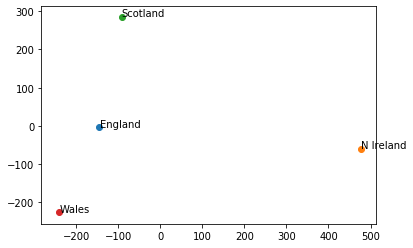

In [22]:
# Lets visualize the principal components

for k, (i, j) in enumerate(zip(X_r[:, 0], X_r[:,1])):
    plt.scatter(i, j)
    plt.text(i + 0.3, j+0.3, df.columns[:-1][k])

plt.show()

From this we can conclude that Ireland is different from the other 3 countries.

In [27]:
def covariance(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    return np.mean([(x-x_mean) * (y-y_mean) for x, y in zip(X,Y)])

In [52]:
df = pd.DataFrame(([1,1,1], [1,2,1], [1,3,2], [1,4,3]), columns=['x', 'y', 'z'])
df

,x,y,z
0,1,1,1
1,1,2,1
2,1,3,2
3,1,4,3


In [53]:
def matrix_covariance(df):
    return [[covariance(df[X], df[Y]) for X in df.columns] for Y in df.columns]

In [54]:
covariance(df['y'], df['y'])

1.25

In [55]:
matrix_covariance(df)

[[0.0, 0.0, 0.0], [0.0, 1.25, 0.875], [0.0, 0.875, 0.6875]]

In [60]:
A = np.array([[2,0],[1,5]])
V = np.array([3,4])

np.dot(A, V)

array([ 6, 23])

Eigenvalues  
Eigenvectors  
Obtain verctor and scaler in just a couple lines of code with np

# Lesson 7: Decision trees

In [101]:
from math import log

def entropy(p):
    return sum([-i * log(i, 2) for i in p])

p = [.5,.5]
print(entropy(p))

p = [.9,.1]
print(entropy(p))


1.0
0.4689955935892812


In [4]:
f = open('datasets/tennis.txt')
tennis_data = [line.split('\t') for line in f.read().split('\n')]
f.close()
tennis_features = ['day', 'outlook', 'temp', 'humidity', 'wind', 'play tennis']
pd.DataFrame(tennis_data, columns = tennis_features).head()

,day,outlook,temp,humidity,wind,play tennis
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


<a href='https://sefiks.com/2017/11/20/a-step-by-step-id3-decision-tree-example'>Step by step decision tree example with tennis dataset</a>

In [162]:
f = open('datasets/churn_modeling.txt')
churn_data = [line.split(',') for line in f.read().split('\n')]
f.close()
churn_features = churn_data[0]
pd.DataFrame(churn_data[1:], columns = churn_features).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


# Lesson 8: Clustering with K-means

### The first step of clustering is declaring how many clusters there will be.
Once you have that we can run a function to find the average of each cluster.
### How does it work?
CLustering works by plotting n (num of clusters) **cluster-centers** randomly on the graph. It then 'colors' each of the points by the closest cluster-centers. These cluster points then move to the average of the points that are colored the same way. This process is repeated until the cluster-centers stop moving. When they stop they become the averages of each cluster. Later when we want to predict the value for a point, we can find out which cluster it belongs to by checking which cluster-center is closest.

### How do we find out how many clusters to use?
#### The Elbow Method
- first we chose a range
- next we can find the distortion of each cluster model and plot them
- when we the **distortion** becomes linear (drastic change, then linear) we use that point.
 - distortion is the sum of all points to their closest cluster-center
 - if you have as many clusters as points, each point would have their own cluster center
 - when this happens the distortion is 0
 - **As we add more clusters distortion gets lower**  

In the case below we would chose 4 clusters because there is a drastic decline before 4 then the line starts to become linear

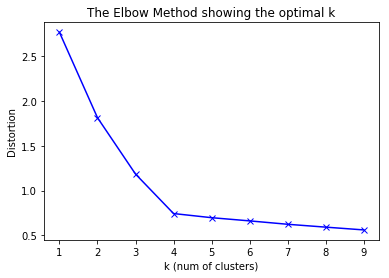

In [25]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (num of clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()